In [18]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 3s (3,288 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [1]:
#드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

#현재 작업 위치 이동
#띄어쓰기에 \붙일 것
%cd /content/drive/MyDrive/이화/ESAA/미니프로젝트1

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/이화/ESAA/미니프로젝트1


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='NanumBarunGothic')

In [3]:
df = pd.read_csv("movies_train.csv")
df.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


# 데이터 전처리

In [5]:
df['dir_prev_bfnum'].fillna(0, inplace=True)

In [6]:
df['release_time']=pd.to_datetime(df['release_time'])

# EDA
- 감독 별 관객 수 상위 10위
- 감독의 이전 영화 평균 관객 수 별 주연배우 수
- 감독의 이전 제작 영화 개수 별 주연배우 수 
- 감독의 이전 영화 평균 관객수 별 관객 수

---
+ title : 영화의 제목
+ distributor : 배급사
+ genre : 장르
+ release_time : 개봉일
+ time : 상영시간(분)
+ screening_rat : 상영등급
+ director : 감독이름
+ dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
+ dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)
+ num_staff : 스텝수
+ num_actor : 주연배우수
+ box_off_num : 관객수

## 감독 별 관객 수 상위 10위

In [19]:
top_director = df.groupby("director").box_off_num.sum().sort_values(ascending=False)[:10]
top_director

director
최동훈    25690504
이석훈    16425919
윤제균    14262766
추창민    13973002
이환경    13347092
우민호    11480550
강형철    11469079
양우석    11374879
류승완     9889560
봉준호     9350351
Name: box_off_num, dtype: int64

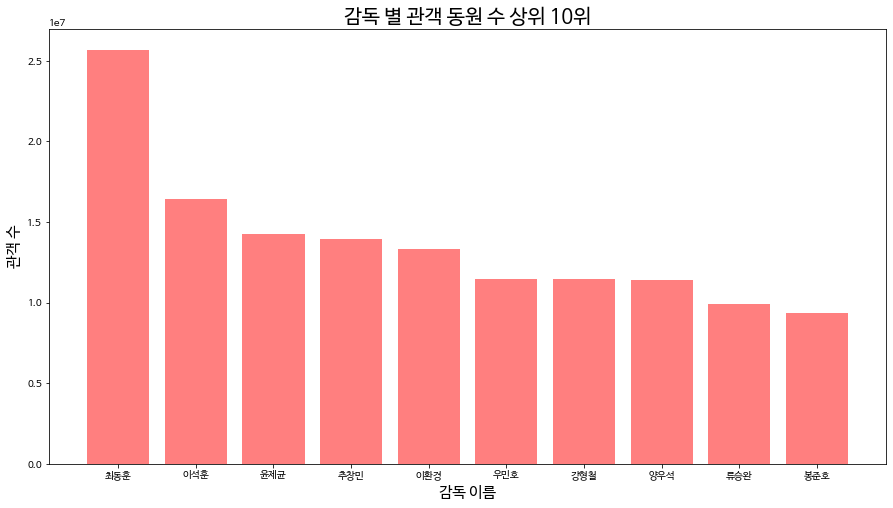

In [23]:
plt.figure(figsize=(15,8))

plt.bar(top_director.index, top_director, color='red', alpha=0.5)

plt.xlabel("감독 이름", fontsize=15)
plt.ylabel("관객 수", fontsize=15)
plt.title("감독 별 관객 동원 수 상위 10위", fontsize=20)

plt.show()

## 감독의 이전 영화 평균 관객 수 별 주연배우 수

In [24]:
df.head(2)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.0,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.5,2,387,3,7072501


In [39]:
df['dir_prev_bfnum'].describe()

count    6.000000e+02
mean     4.726993e+05
std      1.309474e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.761416e+05
max      1.761531e+07
Name: dir_prev_bfnum, dtype: float64

In [46]:
df[['dir_prev_bfnum', 'num_actor']].head(2)

,dir_prev_bfnum,num_actor
0,0.0,2
1,1161602.5,3


In [47]:
avg_box = df.groupby('dir_prev_bfnum').num_actor.mean().astype('int')
avg_box

dir_prev_bfnum
0.0            3
1.0            2
7.0            5
8.0            2
17.0           4
              ..
7838528.5      4
7855474.0      5
8223342.0     11
8801639.0      3
17615314.0     3
Name: num_actor, Length: 246, dtype: int64

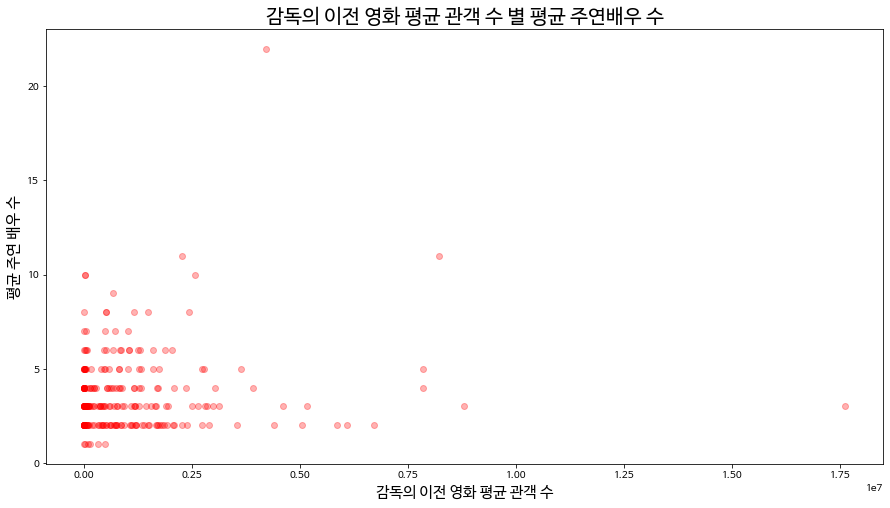

In [54]:
plt.figure(figsize=(15,8))

plt.scatter(avg_box.index, avg_box, color='red', alpha=0.3)

plt.xlabel("감독의 이전 영화 평균 관객 수", fontsize=15)
plt.ylabel("평균 주연 배우 수", fontsize=15)
plt.title("감독의 이전 영화 평균 관객 수 별 평균 주연배우 수", fontsize=20)


plt.show()

## 감독의 이전 제작 영화 개수 별 주연배우 수

In [55]:
df.head(2)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.0,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.5,2,387,3,7072501


In [56]:
df[['dir_prev_num', 'num_actor']].head(2)

,dir_prev_num,num_actor
0,0,2
1,2,3


In [59]:
avg_actor = df.groupby('dir_prev_num').num_actor.mean()
avg_actor

dir_prev_num
0    3.733333
1    3.451327
2    3.709302
3    4.297872
4    3.250000
5    4.000000
Name: num_actor, dtype: float64

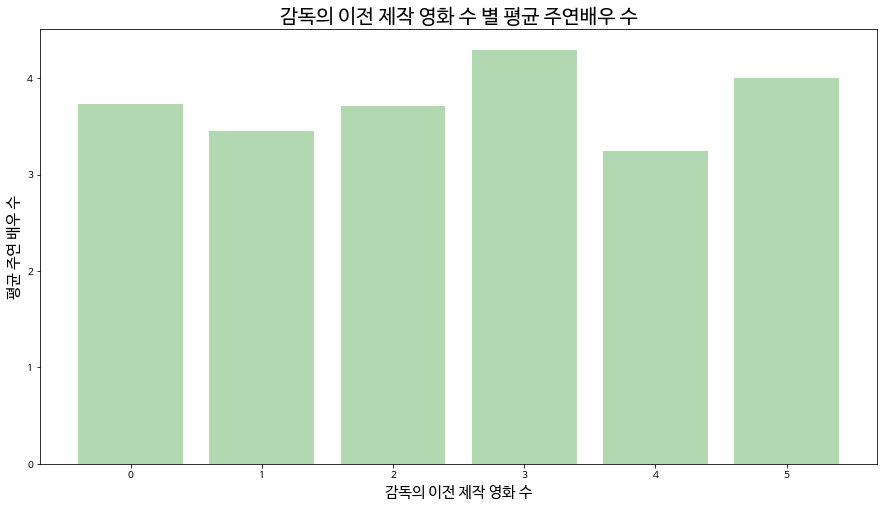

In [61]:
plt.figure(figsize=(15,8))

plt.bar(avg_actor.index, avg_actor, color='green', alpha=0.3)

plt.xlabel("감독의 이전 제작 영화 수", fontsize=15)
plt.ylabel("평균 주연 배우 수", fontsize=15)
plt.title("감독의 이전 제작 영화 수 별 평균 주연배우 수", fontsize=20)

plt.show()

## 감독의 이전 영화 평균 관객수 별 관객 수

In [63]:
df[['dir_prev_num', 'box_off_num']].head(2)

,dir_prev_num,box_off_num
0,0,23398
1,2,7072501


In [65]:
box_per_bfnum = df.groupby('dir_prev_bfnum').box_off_num.mean().astype('int')
box_per_bfnum

dir_prev_bfnum
0.0            349204
1.0            483387
7.0              4941
8.0            283449
17.0            94875
               ...   
7838528.5     4015364
7855474.0     2541603
8223342.0     7453715
8801639.0     2130645
17615314.0          8
Name: box_off_num, Length: 246, dtype: int64

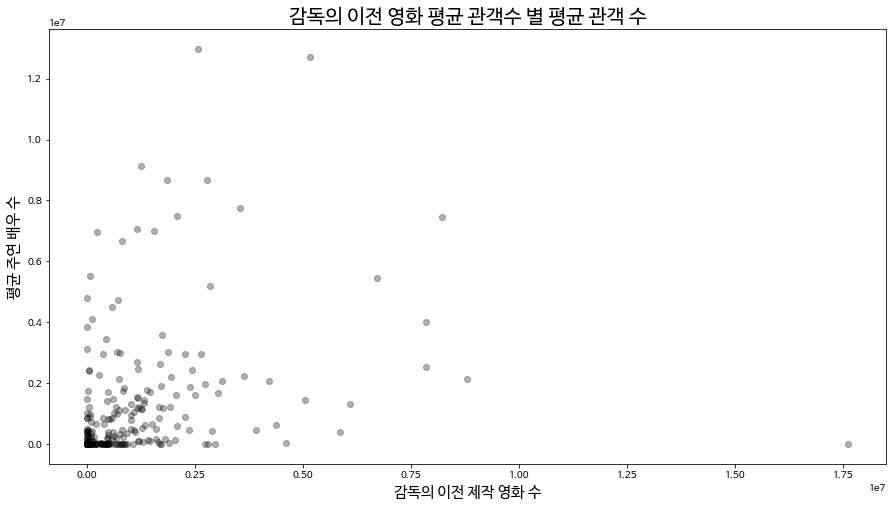

In [67]:
plt.figure(figsize=(15,8))

plt.scatter(box_per_bfnum.index, box_per_bfnum, color='black', alpha=0.3)

plt.xlabel("감독의 이전 제작 영화 수", fontsize=15)
plt.ylabel("평균 주연 배우 수", fontsize=15)
plt.title("감독의 이전 영화 평균 관객수 별 평균 관객 수", fontsize=20)

plt.show()